In [1]:
from uncertainties import ufloat
from uncertainties import unumpy as unp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import THONKtools as THONK

#### Offset, Unsicherheit, Lage der Linsenmitte bei grosser Linsenfassung, x Array und Abstand zwischen rechtem Ende und Linsenmitte

In [2]:
offset=3
u=0.3
mlarge=3.5
xarr=[1,2,3]
rm=2

#### Einlesen von Messdaten

In [3]:
f180=pd.read_csv('measurements/1f80.txt',delimiter='\t',index_col=None)
f180150=pd.read_csv('measurements/1f80+150.txt',delimiter='\t',index_col=None)
f180200=pd.read_csv('measurements/1f80-200.txt',delimiter='\t',index_col=None)
f380200=pd.read_csv('measurements/3f80-200.txt',delimiter='\t',index_col=None)
f320080=pd.read_csv('measurements/3f-200+80.txt',delimiter='\t',index_col=None)
f4=pd.read_csv('measurements/4.txt',delimiter='\t',index_col=None)

In [4]:
f180

,xgross,xschirm,xklein
0,21.2,67.7,56.2
1,21.7,57.3,45.0
2,22.4,53.9,41.3
3,20.7,85.9,75.1
4,20.9,76.5,65.4


In [5]:
f180150

,xgross,xschirm,xklein
0,17.00,76.5,68.0
1,17.30,69.2,60.6
2,17.45,66.9,58.3
3,17.10,72.3,63.7
4,17.00,79.8,71.3


In [6]:
f180200

,xgross,xschirm,xklein
0,27.8,76.5,60.2
1,29.0,70.0,52.7
2,27.5,80.2,54.3
3,27.1,86.0,70.6
4,29.0,69.0,51.5


# ---

In [7]:
f380200

,xgross,xschirm,xklein
0,29.4,69.0,15.5
1,28.3,73.5,19.1
2,27.5,80.8,23.5
3,26.9,88.4,29.0
4,26.8,93.0,32.5
5,26.6,97.1,34.0
6,26.1,106.8,40.0
7,26.0,116.0,46.0
8,25.8,128.6,53.5
9,25.7,137.3,59.0


In [8]:
f320080

,xgross,xschirm,xklein
0,25.0,69.0,17.0
1,24.1,75.0,21.0
2,23.5,81.4,25.0
3,23.1,88.3,29.0
4,22.6,96.9,35.0
5,22.2,108.4,42.0
6,22.1,122.1,49.5
7,21.7,128.4,53.5
8,21.7,135.0,57.5
9,21.4,147.0,65.0


# ---

In [9]:
f4

,lense,distance
0,0+80,17.4
1,0+150,24.3
2,80+150,16.5
3,80-200,24.0
4,-200+80,20.1
5,250 w,36.8
6,250 b,36.4
7,250 r,36.9


### Auftragen von $\frac{1}{b}$ gegen $\frac{1}{g}$

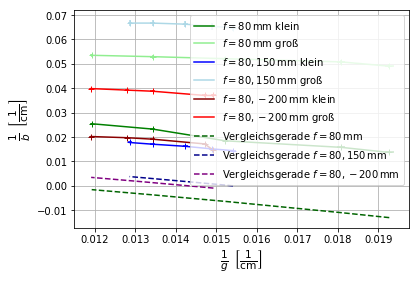

In [10]:
#maybe -9.7-offset ?

x180=[1/x for x in sorted(np.array(f180.xschirm)-rm)]
y180s=[1/x for x in sorted(np.array(f180.xklein)-rm)][::-1]
y180l=[1/x for x in sorted(np.array(f180.xgross)-rm)][::-1]
plt.plot(x180,y180s,color='green',label=r'$f=80\,\mathrm{mm\ klein}$')
plt.plot(x180,y180l,color='lightgreen',label=r'$f=80\,\mathrm{mm\ gro\ss}$')
x180e=unp.std_devs([1/x for x in unp.uarray(np.sort(f180.xschirm)-rm,u)])
y180se=unp.std_devs([1/x for x in unp.uarray(np.sort(f180.xklein)-rm,u)])
y180le=unp.std_devs([1/x for x in unp.uarray(np.sort(f180.xgross)-rm,u)])
plt.errorbar(x180,y180s,xerr=x180e,yerr=y180se,fmt='+',color='green')
plt.errorbar(x180,y180l,xerr=x180e,yerr=y180le,fmt='+',color='lightgreen')

x180150=[1/x for x in sorted(np.array(f180150.xschirm)-rm)]
y180150s=[1/x for x in sorted(np.array(f180150.xklein)-rm)][::-1]
y180150l=[1/x for x in sorted(np.array(f180150.xgross)-rm)][::-1]
plt.plot(x180150,y180150s,color='blue',label=r'$f=80,150\,\mathrm{mm\ klein}$')
plt.plot(x180150,y180150l,color='lightblue',label=r'$f=80,150\,\mathrm{mm\ gro\ss}$')
x180150e=unp.std_devs([1/x for x in unp.uarray(np.sort(f180150.xschirm)-rm,u)])
y180150se=unp.std_devs([1/x for x in unp.uarray(np.sort(f180150.xklein)-rm,u)])
y180150le=unp.std_devs([1/x for x in unp.uarray(np.sort(f180150.xgross)-rm,u)])
plt.errorbar(x180150,y180150s,xerr=x180150e,yerr=y180150se,fmt='+',color='blue')
plt.errorbar(x180150,y180150l,xerr=x180150e,yerr=y180150le,fmt='+',color='lightblue')

x180200=[1/x for x in sorted(np.array(f180200.xschirm)-rm)]
y180200s=[1/x for x in sorted(np.array(f180200.xklein)-rm)][::-1]
y180200l=[1/x for x in sorted(np.array(f180200.xgross)-rm)][::-1]
plt.plot(x180200,y180200s,color='darkred',label=r'$f=80,-200\,\mathrm{mm\ klein}$')
plt.plot(x180200,y180200l,color='red',label=r'$f=80,-200\,\mathrm{mm\ gro\ss}$')
x180200e=unp.std_devs([1/x for x in unp.uarray(np.sort(f180200.xschirm)-rm,u)])
y180200se=unp.std_devs([1/x for x in unp.uarray(np.sort(f180200.xklein)-rm,u)])
y180200le=unp.std_devs([1/x for x in unp.uarray(np.sort(f180200.xgross)-rm,u)])
plt.errorbar(x180200,y180200s,xerr=x180200e,yerr=y180200se,fmt='+',color='darkred')
plt.errorbar(x180200,y180200l,xerr=x180200e,yerr=y180200le,fmt='+',color='red')

def comp(f,g):
    return 1/f-1/(g-9.7-offset)

ycomp80=[comp(80,x) for x in sorted(np.array(f180.xschirm)-rm)]
plt.plot(x180,ycomp80,'--',color='darkgreen',label=r'Vergleichsgerade $f=80\,\mathrm{mm}$')

def comp2(f1,f2,g):
    return (1/f1+1/f2)-1/(g-9.7-offset)

ycomp80150=[comp2(80,150,x) for x in sorted(np.array(f180150.xschirm)-rm)]
plt.plot(x180150,ycomp80150,'--',color='darkblue',label=r'Vergleichsgerade $f=80,150\,\mathrm{mm}$')

ycomp80200=[comp2(80,200,x) for x in sorted(np.array(f180200.xschirm)-rm)]
plt.plot(x180200,ycomp80200,'--',color='purple',label=r'Vergleichsgerade $f=80,-200\,\mathrm{mm}$')

plt.legend()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel(r'$\frac{1}{g}\ \left[\frac{1}{\mathrm{cm}}\right]$',size='15')
plt.ylabel(r'$\frac{1}{b}\ \left[\frac{1}{\mathrm{cm}}\right]$',size='15')
plt.rcParams["figure.figsize"]=fig_size
plt.grid()
plt.show()

## Bessel-Verfahren

In [11]:
def f(e,s):
    return (s**2-e**2)/(4*s)

In [12]:
e180=unp.uarray((f180.xklein-rm),u)-unp.uarray((f180.xgross-rm),u)
s180=unp.uarray((f180.xschirm),u)-unp.uarray([9.7],u)-ufloat(offset,u)
print(THONK.mean(f(e180,s180)))

e180150=-unp.uarray((f180150.xgross-rm),u)+unp.uarray((f180150.xklein-rm),u)
s180150=unp.uarray((f180150.xschirm),u)-unp.uarray([9.7],u)-ufloat(offset,u)
print(THONK.mean(f(e180150,s180150)))

e180200=-unp.uarray((f180200.xgross-rm),u)+unp.uarray((f180200.xklein-rm),u)
s180200=unp.uarray((f180200.xschirm),u)-unp.uarray([9.7],u)-ufloat(offset,u)
print(THONK.mean(f(e180200,s180200)))

8.16+/-0.17
5.80+/-0.19
12.32+/-0.14


In [13]:
print(8)
print(((1/8)+(1/15)-(2/(8*15)))**(-1))
print(((1/8)-(1/20)-(2/(8*-20)))**(-1))

8
5.714285714285714
11.428571428571429


## Abbe-Verfahren

In [14]:
def beta(b,g):
    return b/g

In [15]:
def p(b,g,f,h):
    return (1+1/beta(b,g))*f+h

In [16]:
f380200

,xgross,xschirm,xklein
0,29.4,69.0,15.5
1,28.3,73.5,19.1
2,27.5,80.8,23.5
3,26.9,88.4,29.0
4,26.8,93.0,32.5
5,26.6,97.1,34.0
6,26.1,106.8,40.0
7,26.0,116.0,46.0
8,25.8,128.6,53.5
9,25.7,137.3,59.0


In [17]:
f320080

,xgross,xschirm,xklein
0,25.0,69.0,17.0
1,24.1,75.0,21.0
2,23.5,81.4,25.0
3,23.1,88.3,29.0
4,22.6,96.9,35.0
5,22.2,108.4,42.0
6,22.1,122.1,49.5
7,21.7,128.4,53.5
8,21.7,135.0,57.5
9,21.4,147.0,65.0


In [48]:
g1=unp.uarray(f380200.xklein,u)-9.7-offset
g2=unp.uarray(f320080.xklein,u)-9.7-offset

b1=unp.uarray(f380200.xschirm,u)-g1
b2=unp.uarray(f320080.xschirm,u)-g2

B1=unp.uarray(f380200.xklein,u)*2
B2=unp.uarray(f320080.xklein,u)*2
G=0.7

In [49]:
print(beta(B1,G))
print(beta(B2,G))
print(beta(b1,g1))
print(beta(b2,g2))

[44.28571428571429+/-0.8571428571428571
 54.57142857142858+/-0.8571428571428571
 67.14285714285715+/-0.8571428571428571
 82.85714285714286+/-0.8571428571428571
 92.85714285714286+/-0.8571428571428571
 97.14285714285715+/-0.8571428571428571
 114.28571428571429+/-0.8571428571428571
 131.42857142857144+/-0.8571428571428571
 152.85714285714286+/-0.8571428571428571
 168.57142857142858+/-0.8571428571428571]
[48.57142857142858+/-0.8571428571428571
 60.00000000000001+/-0.8571428571428571
 71.42857142857143+/-0.8571428571428571
 82.85714285714286+/-0.8571428571428571 100.0+/-0.8571428571428571
 120.00000000000001+/-0.8571428571428571
 141.42857142857144+/-0.8571428571428571
 152.85714285714286+/-0.8571428571428571
 164.2857142857143+/-0.8571428571428571
 185.71428571428572+/-0.8571428571428571]
[23.64285714285714+/-2.6424791412759143
 10.484374999999996+/-0.5403670406668676
 6.481481481481481+/-0.2096671472160599
 4.4233128834355835+/-0.10149822441149718
 3.696969696969697+/-0.07276123628394038

In [20]:
f=(1/8)+(1/-20)

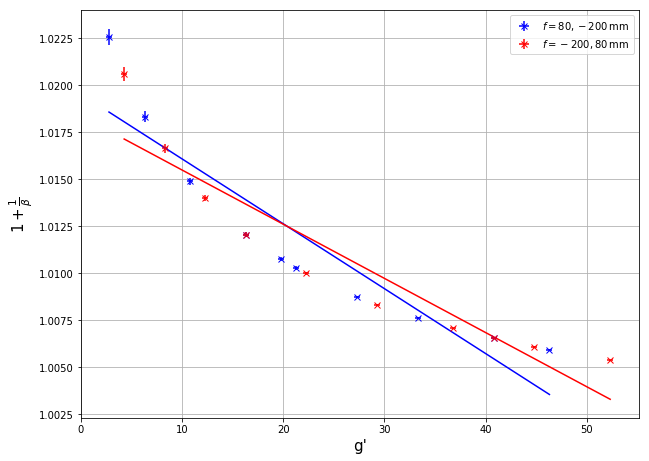

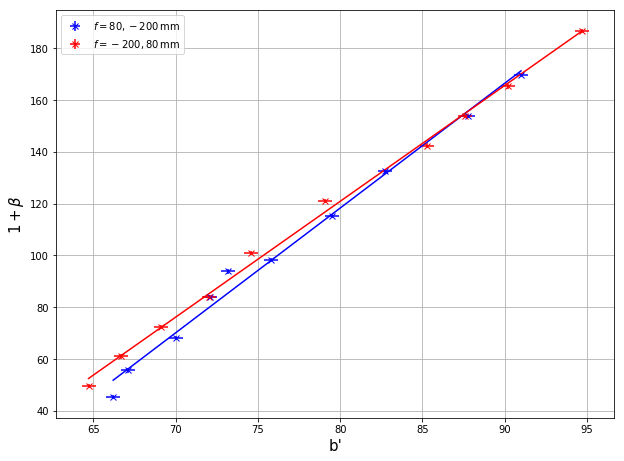

In [50]:
#plt.plot(unp.nominal_values(g1),1+1/unp.nominal_values(beta(b1,g1)),'x',label=r'$f=80,-200\,\mathrm{mm}$')
#plt.plot(unp.nominal_values(g2),1+1/unp.nominal_values(beta(b2,g2)),'x',label=r'$f=-200,80\,\mathrm{mm}$')

plt.errorbar(unp.nominal_values(g1),1+1/unp.nominal_values(beta(B1,G)),xerr=unp.std_devs(g1),yerr=unp.std_devs(1+1/beta(B1,G)),fmt='x',label=r'$f=80,-200\,\mathrm{mm}$',color='blue')
plt.errorbar(unp.nominal_values(g2),1+1/unp.nominal_values(beta(B2,G)),xerr=unp.std_devs(g2),yerr=unp.std_devs(1+1/beta(B2,G)),fmt='x',label=r'$f=-200,80\,\mathrm{mm}$',color='red')
THONK.linreg(unp.nominal_values(g1),1+1/unp.nominal_values(beta(B1,G)),grenz=False,color='blue',labelaus=None)
THONK.linreg(unp.nominal_values(g2),1+1/unp.nominal_values(beta(B2,G)),grenz=False,color='red',labelaus=None)
plt.xlabel('g\'',size='15')
plt.ylabel(r'$1+\frac{1}{\beta}$',size='15')
plt.grid()
plt.legend()
fig=plt.figure()
ax1=fig.add_subplot(111)

ax1.errorbar(unp.nominal_values(b1),1+unp.nominal_values(beta(B1,G)),xerr=unp.std_devs(b1),yerr=unp.std_devs(1+beta(B1,G)),fmt='x',label=r'$f=80,-200\,\mathrm{mm}$',color='blue')
ax1.errorbar(unp.nominal_values(b2),1+unp.nominal_values(beta(B2,G)),xerr=unp.std_devs(b2),yerr=unp.std_devs(1+beta(B2,G)),fmt='x',label=r'$f=-200,80\,\mathrm{mm}$',color='red')
THONK.linreg(unp.nominal_values(b1),1+unp.nominal_values(beta(B1,G)),subplot=ax1,grenz=False,color='blue',labelaus=None)
THONK.linreg(unp.nominal_values(b2),1+unp.nominal_values(beta(B2,G)),subplot=ax1,grenz=False,color='red',labelaus=None)

plt.xlabel('b\'',size='15')
plt.ylabel(r'$1+\beta$',size='15')
plt.legend()
plt.grid()
plt.show()

In [51]:
print('f1 80 200',THONK.a(1+1/unp.nominal_values(beta(B1,G)),unp.nominal_values(g1)))
print('h1 80 200',THONK.b(1+1/unp.nominal_values(beta(B1,G)),unp.nominal_values(g1)))
print('f2 200 80',THONK.a(1+1/unp.nominal_values(beta(B1,G)),unp.nominal_values(b1)))
print('h2 200 80',THONK.b(1+1/unp.nominal_values(beta(B1,G)),unp.nominal_values(b1)))

f1 80 200 2531.4148794459093
h1 80 200 -2479.702872182486
f2 200 80 1507.9422523182984
h2 200 80 -1414.7416689253791


In [52]:
print('f1 80 200',THONK.a(1+1/unp.nominal_values(beta(B2,G)),unp.nominal_values(g2)))
print('h1 80 200',THONK.b(1+1/unp.nominal_values(beta(B2,G)),unp.nominal_values(g2)))
print('f2 200 80',THONK.a(1+1/unp.nominal_values(beta(B2,G)),unp.nominal_values(b2)))
print('h2 200 80',THONK.b(1+1/unp.nominal_values(beta(B2,G)),unp.nominal_values(b2)))

f1 80 200 3120.9740228729884
h1 80 200 -3061.544625330996
f2 200 80 2028.6141494079018
h2 200 80 -1929.6171199068554
